### **Importing Libraries/Frameworks**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

## **Reading CSV and Inspecting**

In [3]:
df = pd.read_csv(r"C:\Portfoilo Projects\Medical-Insurance-Prediction\Data\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df_1 = df.drop(columns= 'sex', axis = 1)
df_1 = df.drop(columns= 'region', axis = 1)
df_1 = df.drop(columns= 'smoker', axis = 1)

## **Plotting**

<function matplotlib.pyplot.show(close=None, block=None)>

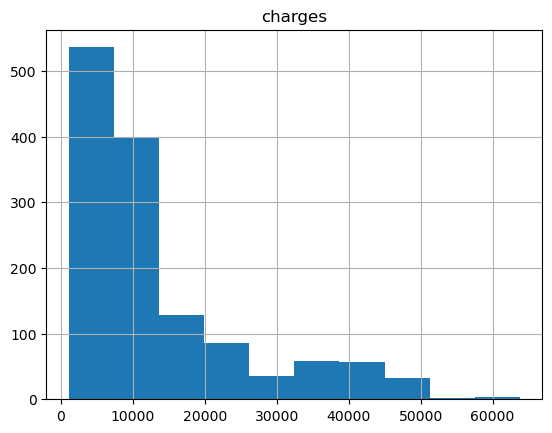

In [7]:
df_1.hist('charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

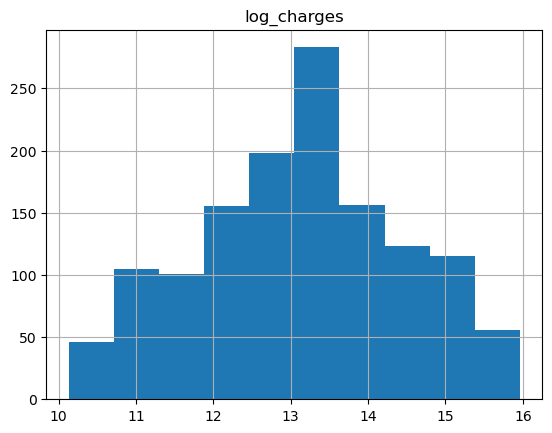

In [8]:
df_1['log_charges'] = np.log2(df_1['charges'])
df['log_charges'] = np.log2(df['charges'])
df_1['is_smoker'] = df['smoker'] == 'yes'

df_1.hist('log_charges')
plt.show

In [15]:
df.drop('smoker', axis =1, inplace = True)
df.drop('region', axis =1, inplace = True)
df.drop('sex', axis =1, inplace = True)
corr = df.corr()
corr

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

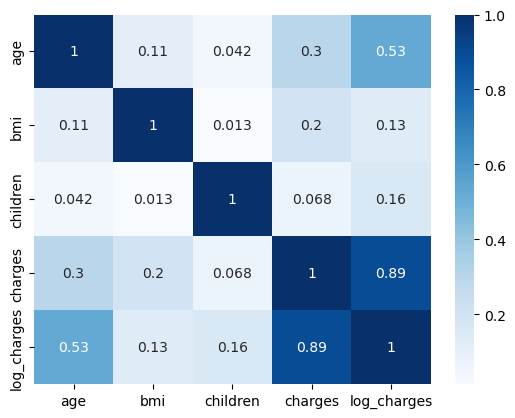

In [16]:
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show

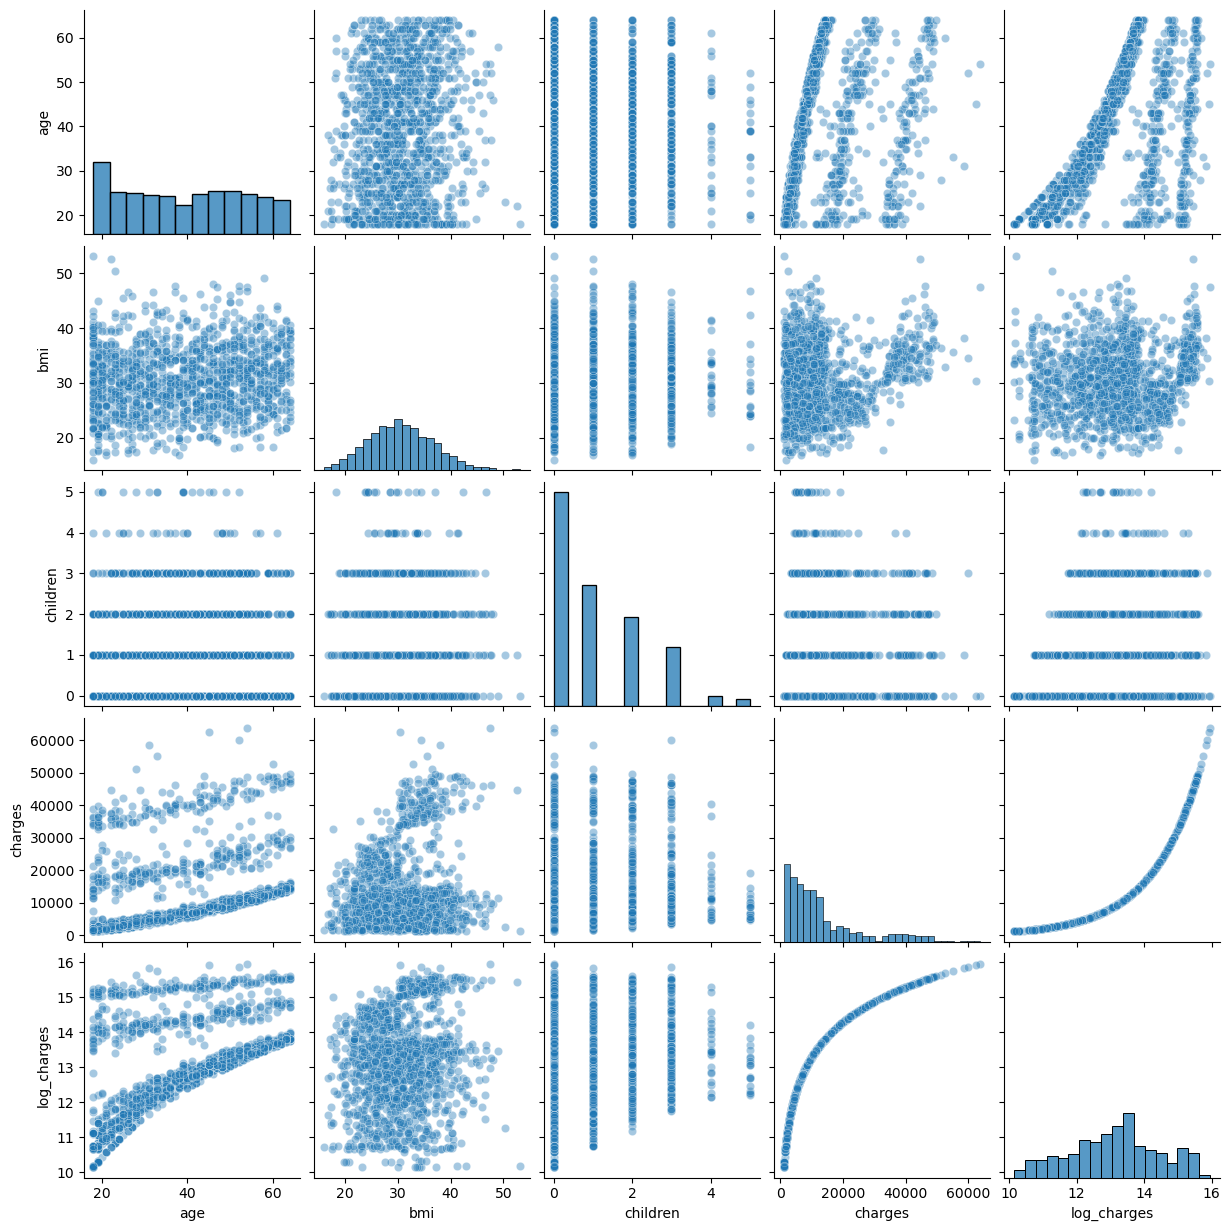

In [17]:
df_numrc = df_1[['age', 'bmi', 'children', 'charges', 'log_charges']]
sns.pairplot(df_numrc, kind='scatter', plot_kws={'alpha': 0.4})

## **Model 1 Building**

In [18]:
X = df_1[['age', 'bmi', 'is_smoker']]
y = df_1['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [46]:
X_train

,age,bmi
476,24,28.500
417,36,22.600
982,31,25.900
951,51,42.900
328,64,33.800
...,...,...
954,34,27.835
298,31,34.390
503,19,30.250
1314,30,23.655


In [47]:
X_test

,age,bmi
117,29,27.940
842,23,32.780
989,24,20.520
623,18,33.535
1304,42,24.605
...,...,...
64,20,22.420
1241,64,36.960
1186,20,35.625
288,59,36.765


In [48]:
y_train

476     15.101136
417     14.183656
982     14.228814
951     15.534512
328     15.548582
          ...    
954     14.288407
298     15.241773
503     14.990296
1314    14.195824
488     15.577108
Name: log_charges, Length: 205, dtype: float64

In [49]:
y_test

117     14.221873
842     15.136551
989     13.830900
623     15.079228
1304    14.375812
          ...    
64      13.844681
1241    15.597403
1186    15.193269
288     15.547641
1100    14.034137
Name: log_charges, Length: 69, dtype: float64

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([0.05025334, 0.01608828, 2.23414187])

In [20]:
y_pred = model.predict(X_train)

In [21]:
y_pred

array([12.85151805, 12.97207718, 13.23203154, ..., 13.53861937,
       15.07822089, 13.46387649])

In [22]:
train_mse = mean_squared_error(y_train, y_pred)
train_mse

0.4543584098722668

In [23]:
#undo log transformation
train_mse_org = np.exp2(mean_squared_error(y_train, y_pred))
train_mse_org

np.float64(1.370173330933378)

In [24]:
train_r2 = r2_score(y_train, y_pred)
train_r2

0.737066139753993

## **Model 1 Evaluation**

In [25]:
plot_df = pd.DataFrame({
    'Predictions' : y_pred,
    'Actual' : X_train['is_smoker'],
    'age' : X_train['age'],
    'bmi' : X_train['bmi'],
    'Residuals' : y_train - y_pred,
})

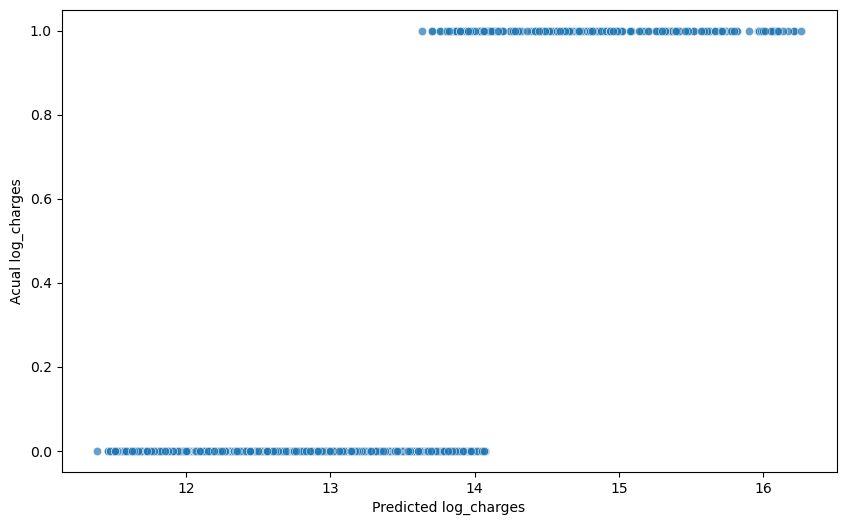

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predictions', y='Actual', data=plot_df, alpha=0.7)
plt.xlabel('Predicted log_charges')
plt.ylabel('Acual log_charges')

plt.show()

<Axes: xlabel='Predictions', ylabel='Residuals'>

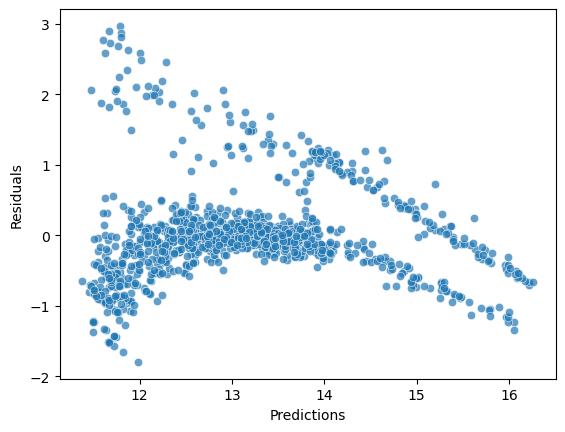

In [27]:
sns.scatterplot(x='Predictions', y='Residuals', data=plot_df, alpha=0.7)

In [28]:
test_pred = model.predict(X_test)

mean_squared_error(y_test, test_pred)

0.429506494203284

In [29]:
np.exp2(mean_squared_error(y_test, test_pred))

np.float64(1.346772804590541)

## **Model 2 Building**

In [30]:
smokers_df =df_1[df_1['is_smoker'] == True]

In [31]:
X = smokers_df[['age', 'bmi']]
y = smokers_df['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
smoker_model = LinearRegression(fit_intercept= True)
smoker_model.fit(X_train, y_train)
smoker_model.coef_

array([0.01282851, 0.07098738])

In [33]:
y_pred = smoker_model.predict(X_train)

## **Model 2 Evaluation**

In [34]:
train_mse = mean_squared_error(y_train, y_pred)
train_mse

0.07046354357369708

In [35]:
train_r2 = r2_score(y_train, y_pred)
train_r2

0.7661650418251627

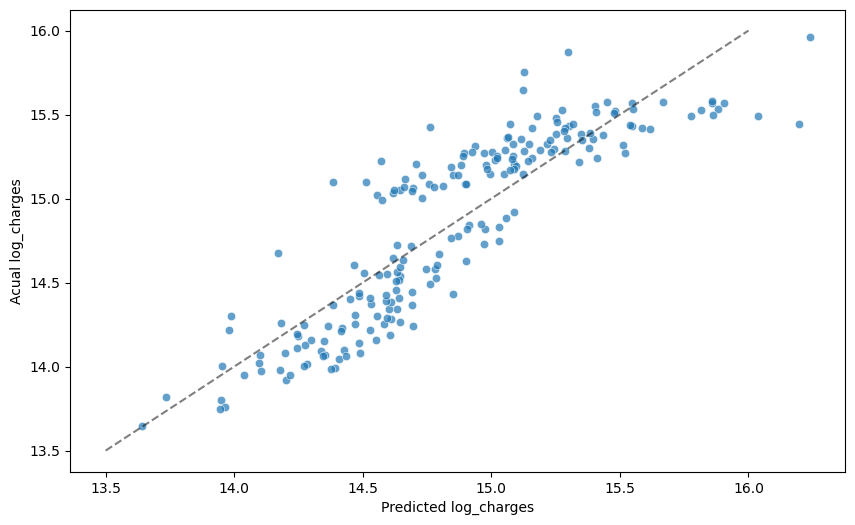

In [42]:
plot_df = pd.DataFrame({
    'Predictions' : y_pred,
    'Actual' : y_train,
    'age' : X_train['age'],
    'bmi' : X_train['bmi'],
    'Residuals' : y_train - y_pred,
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predictions', y='Actual', data=plot_df, alpha=0.7)
plt.plot([13.5, 16], [13.5, 16], 'k--', alpha = 0.5)
plt.xlabel('Predicted log_charges')
plt.ylabel('Acual log_charges')

plt.show()

<Axes: xlabel='Predictions', ylabel='Residuals'>

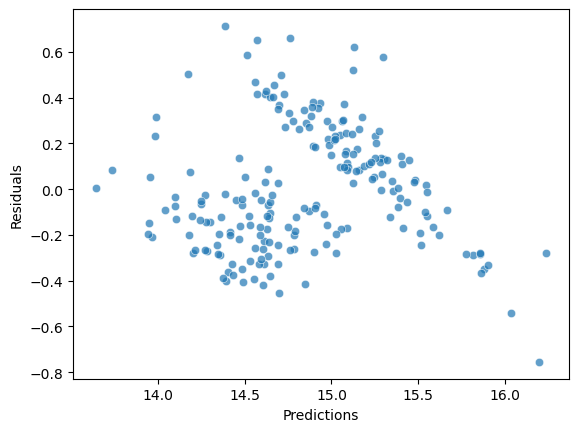

In [43]:
sns.scatterplot(x='Predictions', y='Residuals', data=plot_df, alpha=0.7)

In [44]:
test_pred = smoker_model.predict(X_test)

mean_squared_error(y_test, test_pred)

0.09416078156173796

## **Hyperparameter Tuning**

In [45]:
# Define the model
model = Ridge()

# Define the hyperparameter grid
param_grid = {
'alpha': [0.1, 1.0, 10.0, 100.0], # Regularization strength
'fit_intercept': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 100.0, 'fit_intercept': True}
Best Score: -0.07227671327429633


## **Predicting With Made Up Data**

In [69]:
age = 19                                          # lets predict a patient with age 19 and bmi 23
bmi = 23
model_test = pd.DataFrame([age, bmi]).transpose()
model_test.columns = ['age', 'bmi']
model_test

,age,bmi
0,19,23


In [84]:
new_pred = smoker_model.predict(model_test)
new_pred = np.exp2(new_pred)
new_pred.round(3)

array([17057.766])